## MA755 - Assignment 1

Set up the working directory

In [19]:
import os
os.getcwd() 
os.chdir('C:\\Users\\katri\\Desktop\\MA755\\Assignment\\Assignment1')
os.getcwd()

'C:\\Users\\katri\\Desktop\\MA755\\Assignment\\Assignment1'

### Load the data

In [80]:
import os
import zipfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://ed-public-download.apps.cloud.gov/downloads/"
COLLEGE_PATH = "datasets/college"
COLLEGE_URL = DOWNLOAD_ROOT + "CollegeScorecard_Raw_Data.zip"

def fetch_college_data(college_url=COLLEGE_URL, college_path=COLLEGE_PATH):
    os.makedirs(college_path, exist_ok=True)
    zip_path = os.path.join(college_path, "Raw_Data.zip")
    urllib.request.urlretrieve(college_url, zip_path)
    college_zip = zipfile.ZipFile(zip_path)
    college_zip.extractall(path=college_path)
    college_zip.close()

In [25]:
fetch_college_data()

In [26]:
import pandas as pd
DATA_PATH= "datasets/college/CollegeScorecard_Raw_Data"

def load_college_data(data_path=DATA_PATH):
    # `data_path` is relative to the directory containing this script
    csv_path = os.path.join(data_path, "MERGED2014_15_PP.csv")
    return pd.read_csv(csv_path)

Use the defined function load_college_data() to load the data and check the type of the dataset

In [43]:
collegeOrignal = load_college_data()
print(type(collegeOrignal))

<class 'pandas.core.frame.DataFrame'>


C:\Users\katri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (6,9,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1411,1425,1427,1503,1517,1529,1530,1532,1537,1540,1541,1542,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1605,1606,1609,1610,1613,1614,1615,1725,1726,1727,1728,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


### General Information about the data

Based on the original dataset, a new dataframe is created, which includes the variables we mainly focus on:<br>

| Variables| Description           | Note  |
| ---------|:-------------:| -----:|
| PCTFLOAN |Rate of receiving federal loans |Dependent |
| DEBT_MDN |Cumulative Median Debt       |Independent |
| FAMINC   |Average family income in real 2015 dollars |Independent|  
| HIGHDEG  |  Highest degree awarded| Independent  |
| REGION   | Region |Independent|

Let’s have a quick look at the first 5 rows of the data by using the DataFrame’s **head()** method.

In [44]:
college=college[['PCTFLOAN','DEBT_MDN','FAMINC','HIGHDEG','REGION']]
college.head()

,PCTFLOAN,DEBT_MDN,FAMINC,HIGHDEG,REGION
0,0.8284,15000,30235.73401,4,5
1,0.5214,14382,49731.07607,4,5
2,0.7795,9500,19862.04352,4,5
3,0.4596,15750,52681.57006,4,5
4,0.7554,14362,29758.63871,4,5


From the first 5 rows of the data, there are two variables (that is, HIGHDEG and REGION) have repetitive values, which indicates that they might be categorical variables. <br>
Use the **value_counts()** method to have a closer look at these two variables.

In [70]:
college["HIGHDEG"].value_counts()

1    2606
4    2026
2    1671
3     937
0     463
Name: HIGHDEG, dtype: int64

In [71]:
college["REGION"].value_counts()

5    1890
2    1182
3    1147
8    1099
6     821
4     663
1     442
7     297
9     161
0       1
Name: REGION, dtype: int64

Use the **info()** method to get to know the total number of observations in the dataset and the general information about each variables, such as type, number of missing values. 

In [39]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 5 columns):
PCTFLOAN    6966 non-null float64
DEBT_MDN    7671 non-null object
FAMINC      7497 non-null object
HIGHDEG     7703 non-null int64
REGION      7703 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 301.0+ KB


From the general information, as shown above, the variables *DEBT_MDN* and *FAMINC* are not numeric, and the variables *HIGHDEG* and *REGION* are not categorical; therefore, the change of variable types is needed.

In [69]:
college["DEBT_MDN"]=pd.to_numeric(college["DEBT_MDN"],errors='coerce')
college["FAMINC"]=pd.to_numeric(college["FAMINC"],errors='coerce')
college["HIGHDEG"] = college["HIGHDEG"].astype('category')
college["REGION"] = college["REGION"].astype('category')

Use the **describe()** method to demonstrate the basic statistics of each numerical variables: number of rows, mean, standard deviation, minimum, first quartile, second quartile, third quartile and maximum.<br>
**_`Note`_**: the missing values are automatically excluded on the row `count`, `mean`, `min` and `max`

In [74]:
college.describe()

C:\Users\katri\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PCTFLOAN,DEBT_MDN,FAMINC
count,6966.000000,7386.000000,7386.000000
mean,0.523092,35353.389779,35353.389779
std,0.284088,21962.527660,21962.527660
min,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,1.000000,152099.754600,152099.754600


Use the **hist()** method to plot a histogram for numerical variables in order to know the distribution of each numerical variable.

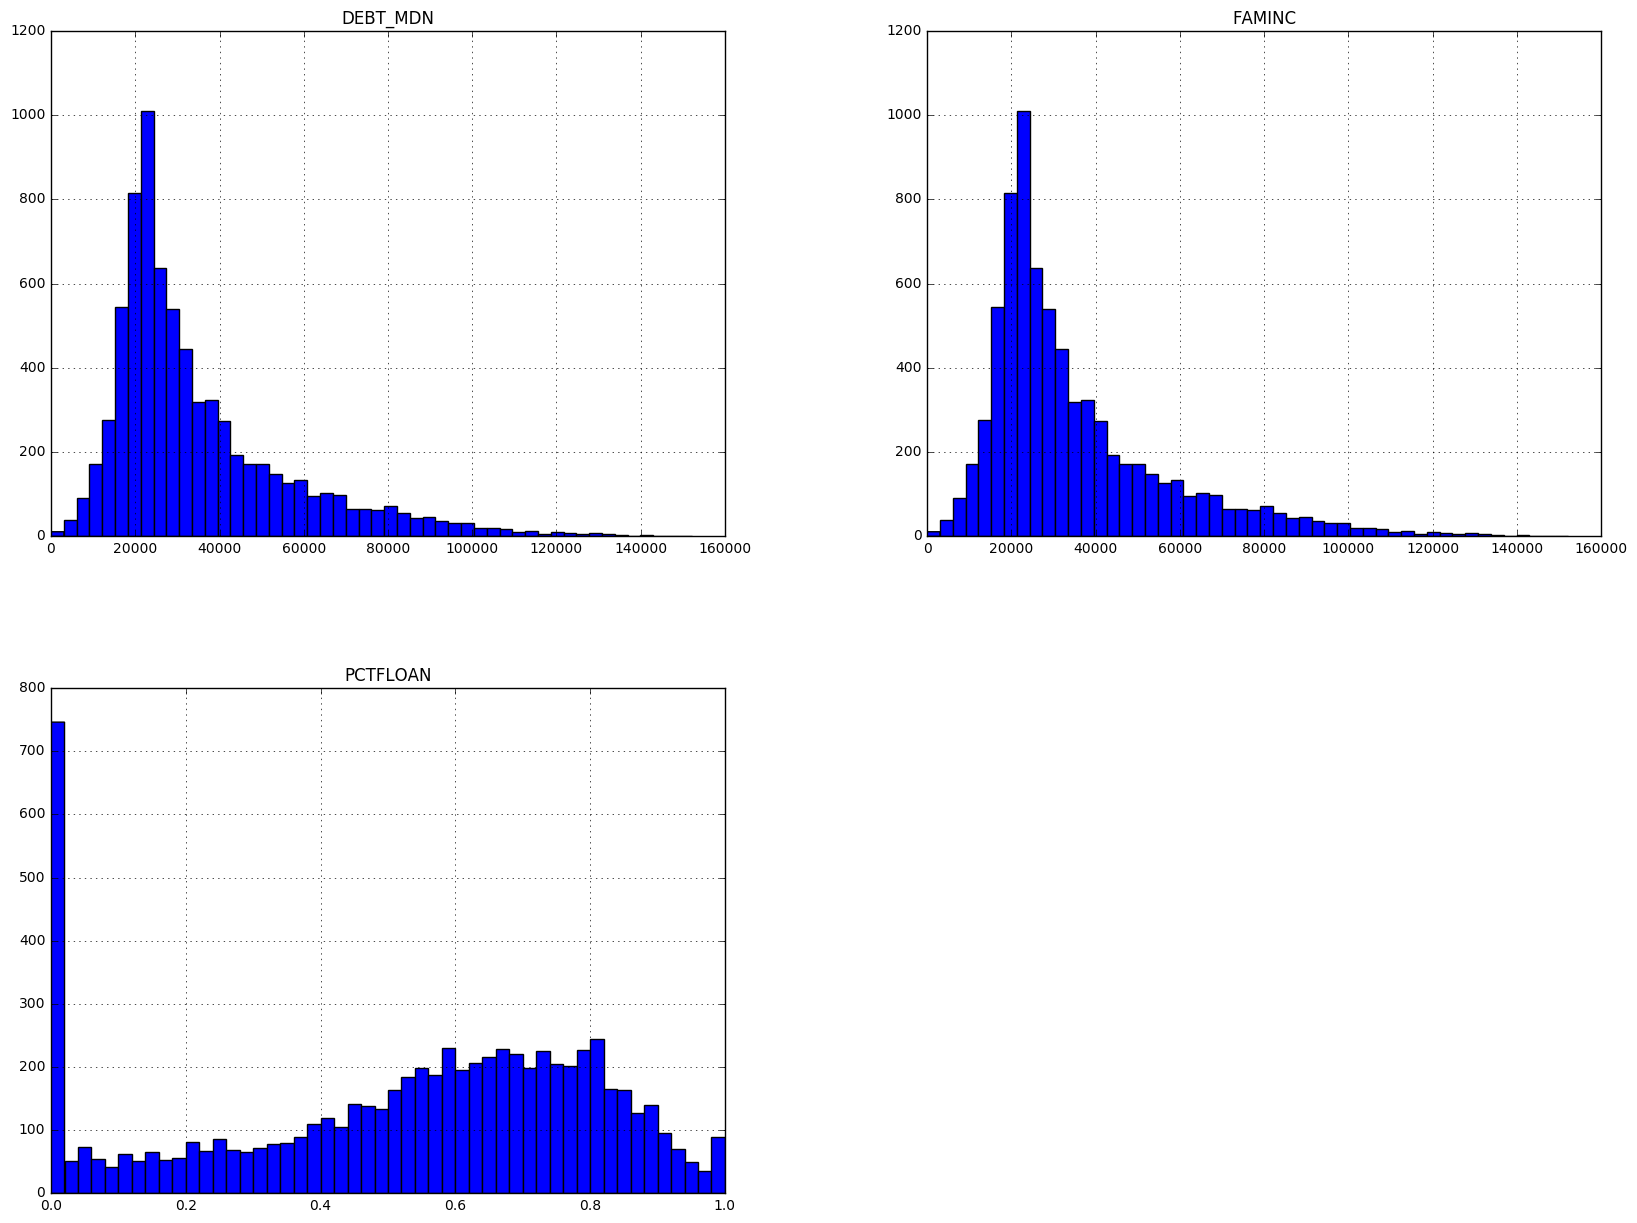

In [75]:
%matplotlib inline 
import matplotlib.pyplot as plt
college.hist(bins=50, figsize=(20,15))
plt.show()

**_`Note`_**: **%matplotlib inline** can be used only in a Jupyter notebook. It allows Jupyter to create Matplotlib so that the Jupyter's own backend is available to be used. Moreover, **show()** is optional. 

### Data Splitting
Define the function that is used to split the dataset. 80% of the data will be used as the training set (named `train_set`), and 20% used as the test set (named `test_set`). There are approaches to split the data, as shown in the following part.

**_Method 1_**

In [77]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [78]:
train_set, test_set = split_train_test(college, 0.2)
print(len(train_set), "train +", len(test_set), "test")

6163 train + 1540 test


**_Method 2_** <br>
This method uses the unique identifier to decide whether the corresponding instance should be partitioned to the test set, which helps to aviod the situation that the test set changes whenever the program is run again.

In [84]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

The identifiler column is needed to created because the dataset does not have one. The column is named **_`id`_**.

In [82]:
college_with_id = college.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(college_with_id, 0.2, "index")

In [85]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(college, test_size=0.2, random_state=42)

**_`note`_**: for the code below, the random generator seed can be set up by adding values to the **random_state** parameter. 

#### Stratified Sampling